<a href="https://colab.research.google.com/github/PranavBykampadi/LocalLink/blob/main/RP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Loading in our data and importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('T1.csv')
data.head()
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [3]:
'''import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
data = pd.read_csv('T1.csv')

# Initialize lists to store data
time_list = []
mean_active_power_list = []
mean_theoretical_power_list = []

# Iterate through hours and minutes
for i in range(24):
    for j in range(6):
        temporary_wind_power_subset = data[(data['Hour'] == i) & (data['Minute'] == j * 10)]
        mean_active_power = temporary_wind_power_subset['LV ActivePower (kW)'].mean()
        mean_theoretical_power = temporary_wind_power_subset['Theoretical_Power_Curve (KWh)'].mean()
        current_time = temporary_wind_power_subset['Hour'].iloc[0] + temporary_wind_power_subset['Minute'].iloc[0] / 60

        mean_active_power_list.append(mean_active_power)
        mean_theoretical_power_list.append(mean_theoretical_power)
        time_list.append(current_time)

# Create a DataFrame with the computed values
daily_average_power = pd.DataFrame({'Time': time_list, 'MeanActivePower': mean_active_power_list, 'MeanTheoreticalPower': mean_theoretical_power_list})

# Plot the data
plt.plot(daily_average_power['Time'], daily_average_power['MeanActivePower'], linestyle='-', color='red', label='Active Power')
plt.plot(daily_average_power['Time'], daily_average_power['MeanTheoreticalPower'], linestyle='-', color='green', label='Theoretical Power')
plt.ylim(1000, 1700)
plt.title('Power Throughout the Day')
plt.xlabel('Time (hours since 12:00)')
plt.ylabel('Power (kW)')
plt.legend(loc='upper left')
plt.show()'''


"import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Load your data into a DataFrame\ndata = pd.read_csv('T1.csv')\n\n# Initialize lists to store data\ntime_list = []\nmean_active_power_list = []\nmean_theoretical_power_list = []\n\n# Iterate through hours and minutes\nfor i in range(24):\n    for j in range(6):\n        temporary_wind_power_subset = data[(data['Hour'] == i) & (data['Minute'] == j * 10)]\n        mean_active_power = temporary_wind_power_subset['LV ActivePower (kW)'].mean()\n        mean_theoretical_power = temporary_wind_power_subset['Theoretical_Power_Curve (KWh)'].mean()\n        current_time = temporary_wind_power_subset['Hour'].iloc[0] + temporary_wind_power_subset['Minute'].iloc[0] / 60\n\n        mean_active_power_list.append(mean_active_power)\n        mean_theoretical_power_list.append(mean_theoretical_power)\n        time_list.append(current_time)\n\n# Create a DataFrame with the computed values\ndaily_average_power = pd.DataFrame({'Time': time_list, 'Me

In [4]:
! pip install windrose


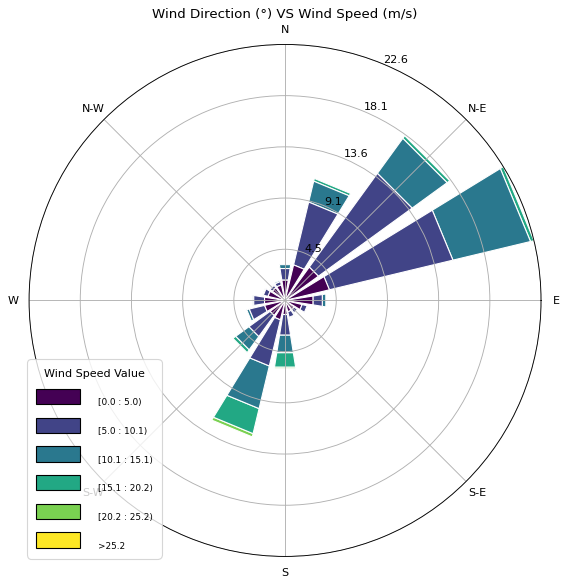

In [5]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(data['Wind Direction (°)'], data['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
legend = ax.set_legend(title="Wind Speed Value",prop = {'size':20})
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

In [6]:
#data = data.drop('Theoretical_Power_Curve (KWh)', axis=1)
data = data.drop('Date/Time', axis=1)

data.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,380.047791,5.311336,416.328908,259.994904
1,453.769196,5.672167,519.917511,268.641113
2,306.376587,5.216037,390.900016,272.564789
3,419.645905,5.659674,516.127569,271.258087
4,380.650696,5.577941,491.702972,265.674286


In [7]:
y = data['LV ActivePower (kW)']
print(y)

0         380.047791
1         453.769196
2         306.376587
3         419.645905
4         380.650696
            ...     
50525    2963.980957
50526    1684.353027
50527    2201.106934
50528    2515.694092
50529    2820.466064
Name: LV ActivePower (kW), Length: 50530, dtype: float64


In [8]:
X = data.drop(columns='LV ActivePower (kW)')

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
print("X_train dimension: ", X_train.shape)
print("X_test dimension: ", X_test.shape)
print("y_train dimension: ", y_train.shape)
print("y_test dimension: ", y_test.shape)

X_train dimension:  (40424, 3)
X_test dimension:  (10106, 3)
y_train dimension:  (40424,)
y_test dimension:  (10106,)


In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
predictions = regression_model.predict(X_test)
print("Linear Regression Root Mean Squared Error is: ",mean_squared_error(y_test,predictions,squared = False))
print("Linear Regression Mean Absolute Error is: ",mean_absolute_error(y_test, predictions))




Linear Regression Root Mean Squared Error is:  386.92917059461627
Linear Regression Mean Absolute Error is:  181.8471574677254


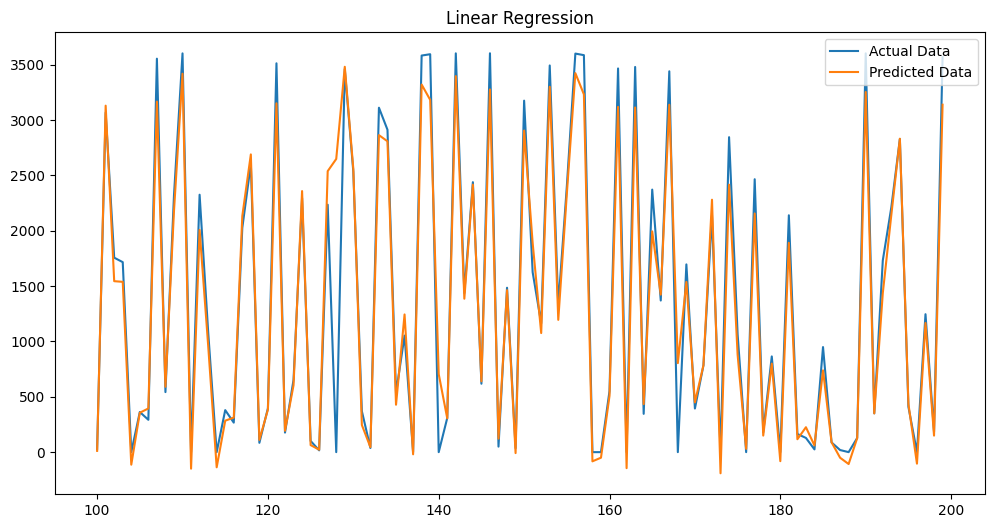

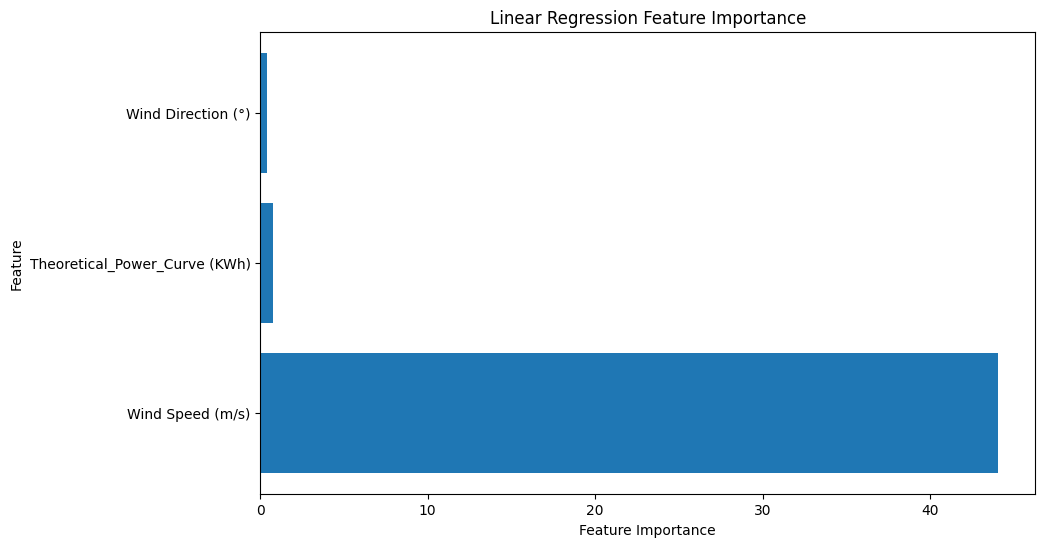

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(100, 200), y_test[100:200], label='Actual Data')
plt.plot(range(100, 200), predictions[100:200], label='Predicted Data')
plt.title('Linear Regression')
plt.legend()

feature_importance_lr = pd.DataFrame({'Feature': X_train.columns, 'Importance': regression_model.coef_})
feature_importance_lr = feature_importance_lr.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_lr['Feature'], feature_importance_lr['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Linear Regression Feature Importance')
plt.show()


In [13]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=0)
random_forest_model.fit(X_train, y_train)
predictions = random_forest_model.predict(X_test)
print("Random Forest Regressor Root Mean Squared Error is: ",mean_squared_error(y_test,predictions,squared = False))
print("Random Forest Regressor Absolute Error is: ",mean_absolute_error(y_test, predictions))
print((y_test.std()))



Random Forest Regressor Root Mean Squared Error is:  362.30400388526243
Random Forest Regressor Absolute Error is:  152.68501991254007
1307.5035282367373


                         Feature  Importance
1  Theoretical_Power_Curve (KWh)    0.546626
0               Wind Speed (m/s)    0.433678
2             Wind Direction (°)    0.019696


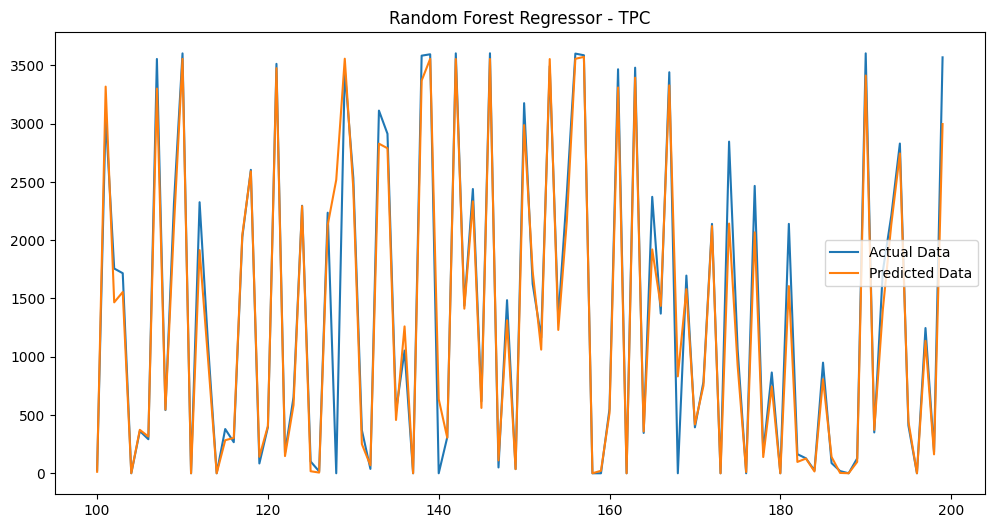

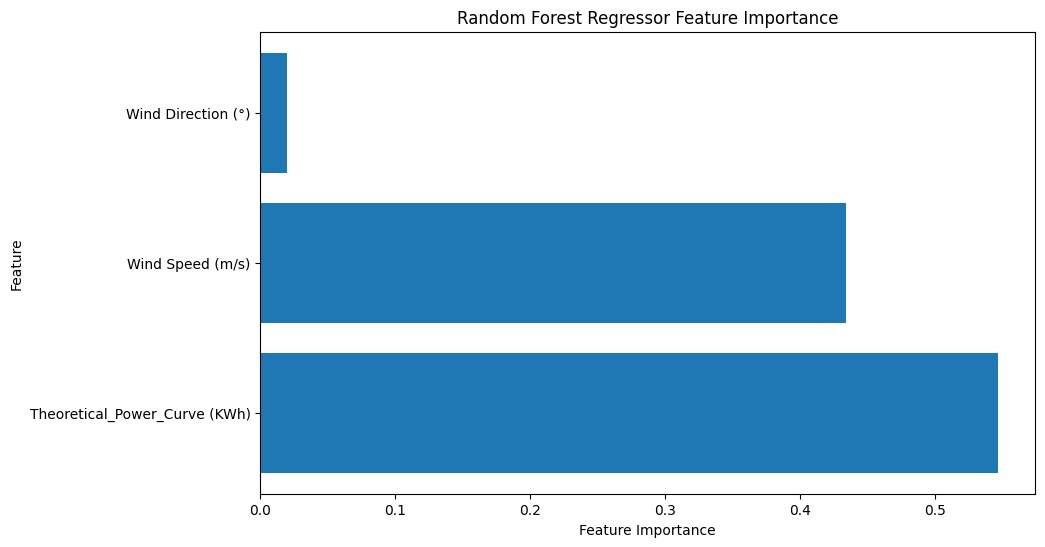

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(100, 200), y_test[100:200], label='Actual Data')
plt.plot(range(100, 200), predictions[100:200], label='Predicted Data')
plt.title('Random Forest Regressor - TPC')
plt.legend()
feature_importances_rf = random_forest_model.feature_importances_
feature_names = X_train.columns
feature_importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)
print(feature_importance_df_rf)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regressor Feature Importance')
plt.show()

Epoch 1/25
2527/2527 - 9s - loss: 430344.9062 - val_loss: 155933.0938 - 9s/epoch - 4ms/step
Epoch 2/25
2527/2527 - 7s - loss: 171647.8750 - val_loss: 157451.0156 - 7s/epoch - 3ms/step
Epoch 3/25
2527/2527 - 8s - loss: 168423.8281 - val_loss: 150154.5312 - 8s/epoch - 3ms/step
Epoch 4/25
2527/2527 - 7s - loss: 166075.8906 - val_loss: 148548.5469 - 7s/epoch - 3ms/step
Epoch 5/25
2527/2527 - 8s - loss: 164452.5469 - val_loss: 146119.8438 - 8s/epoch - 3ms/step
Epoch 6/25
2527/2527 - 7s - loss: 162744.5000 - val_loss: 144804.0469 - 7s/epoch - 3ms/step
Epoch 7/25
2527/2527 - 7s - loss: 161506.7344 - val_loss: 145999.5781 - 7s/epoch - 3ms/step
Epoch 8/25
2527/2527 - 8s - loss: 166100.1250 - val_loss: 157798.6094 - 8s/epoch - 3ms/step
Epoch 9/25
2527/2527 - 7s - loss: 163429.5000 - val_loss: 143806.2969 - 7s/epoch - 3ms/step
Epoch 10/25
2527/2527 - 8s - loss: 161896.9688 - val_loss: 143065.0000 - 8s/epoch - 3ms/step
Epoch 11/25
2527/2527 - 7s - loss: 161194.4062 - val_loss: 142198.1406 - 7s/epo

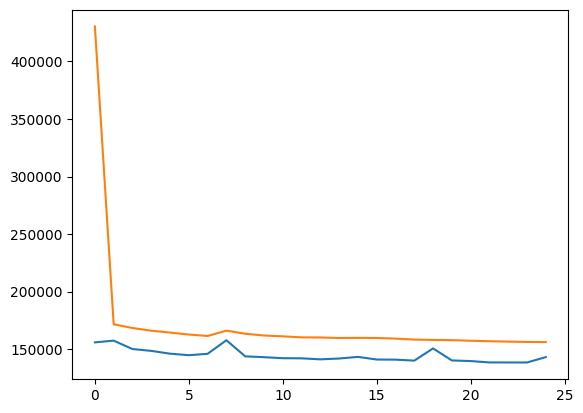

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(8, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_test, y_test), verbose=2)
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
lstm_layer_weights = model.layers[0].get_weights()

dense_layer_weights = model.layers[1].get_weights()


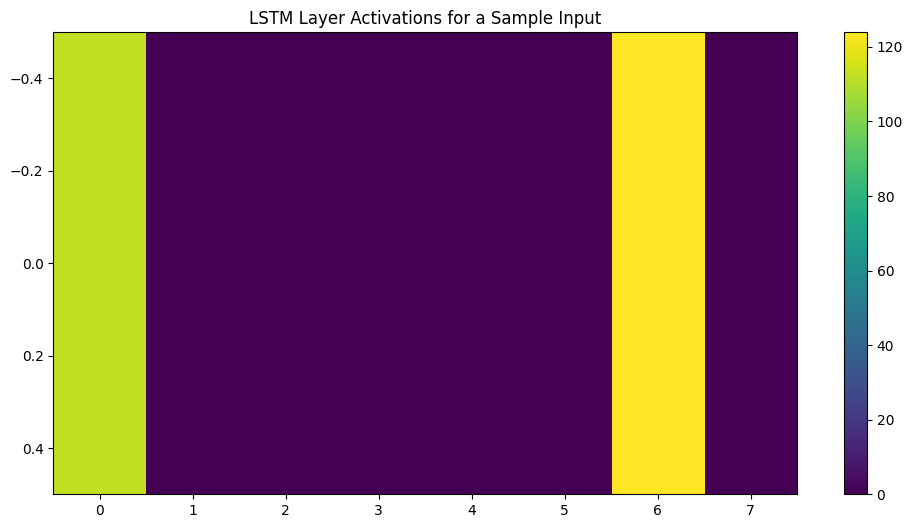

In [16]:
from tensorflow import keras
K = keras.backend

sample_index = 0  # random index to visualize
sample_input = X_test.iloc[sample_index]  # Using .iloc to access rows in a DataFrame

# Creating a function to get the activations of the LSTM layer
get_lstm_activations = K.function([model.layers[0].input], [model.layers[0].output])

# Getting the LSTM activations for the sample input
lstm_activations = get_lstm_activations(np.array([sample_input]))[0]

# Visualizing the LSTM activations
plt.figure(figsize=(12, 6))
plt.imshow(lstm_activations, aspect='auto')
plt.title('LSTM Layer Activations for a Sample Input')
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Loss Comparison - LSTM')

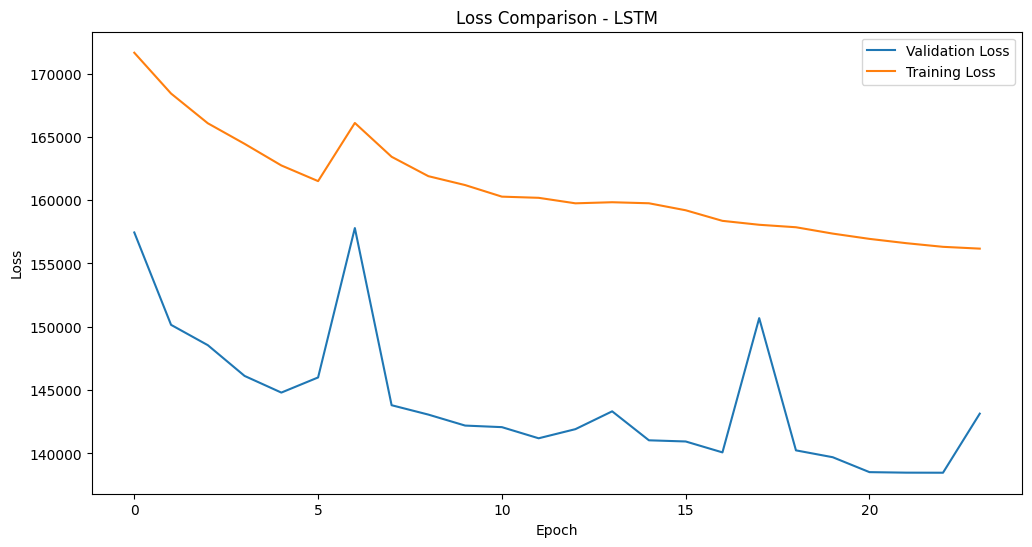

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_loss'][1:], label='Validation Loss')
plt.plot(history.history['loss'][1:], label='Training Loss')

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Comparison - LSTM')

In [18]:
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Scatterpolar(
        r = data['LV ActivePower (kW)'][:100],
        theta = data['Wind Direction (°)'][:100],
        mode = 'markers',
    ))

fig.update_layout(showlegend=False)
fig.show()

316/316 [==============================] - 1s 2ms/step
LSTM Root Mean Squared Error is:  378.33884763003675
LSTM Mean Absolute Error is:  183.6360297640271


Text(0.5, 1.0, 'LSTM')

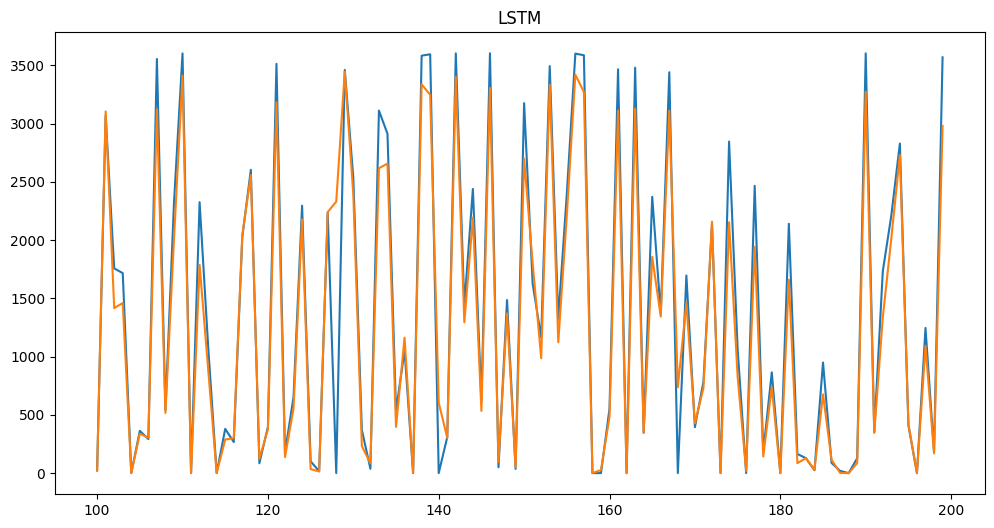

In [19]:
predictions = model.predict(X_test)

print("LSTM Root Mean Squared Error is: ",mean_squared_error(y_test,predictions,squared = False))
print("LSTM Mean Absolute Error is: ",mean_absolute_error(y_test, predictions))
plt.figure(figsize=(12, 6))
plt.plot(range(100, 200), y_test[100:200], label='Actual Data')
plt.plot(range(100, 200), predictions[100:200], label='Predicted Data')
plt.title('LSTM')

XGBoost Mean Absolute Error: 170.8283872481591
XGBoost Root Mean Squared Error: 429.2009105684336


Text(0.5, 1.0, 'XGBoost')

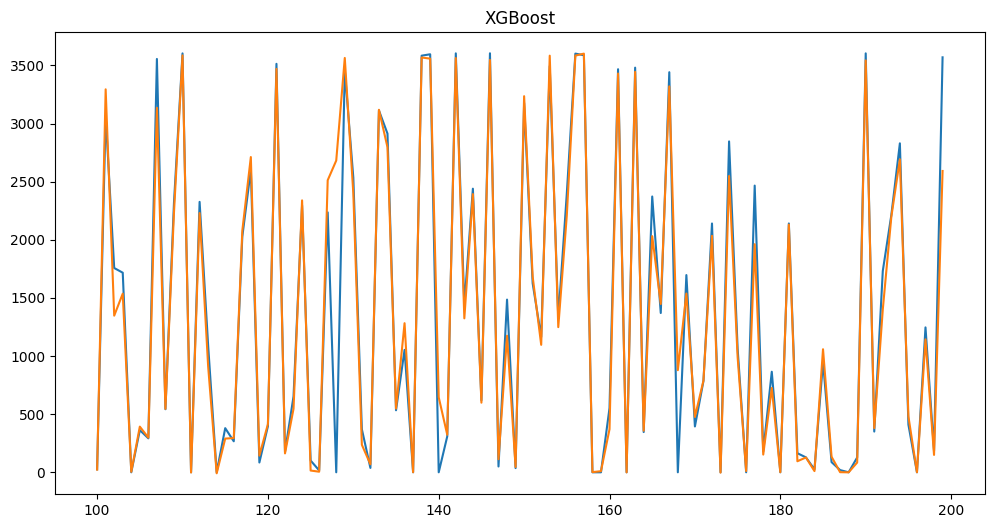

In [20]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=500, max_depth=7)

xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
print("XGBoost Mean Absolute Error:", xgb_mae)
print("XGBoost Root Mean Squared Error:", xgb_rmse)
plt.figure(figsize=(12, 6))
plt.plot(range(100, 200), y_test[100:200], label='Actual Data')
plt.plot(range(100, 200), xgb_predictions[100:200], label='Predicted Data')
plt.title('XGBoost')

                         Feature  Importance
1  Theoretical_Power_Curve (KWh)    0.844929
0               Wind Speed (m/s)    0.141743
2             Wind Direction (°)    0.013328


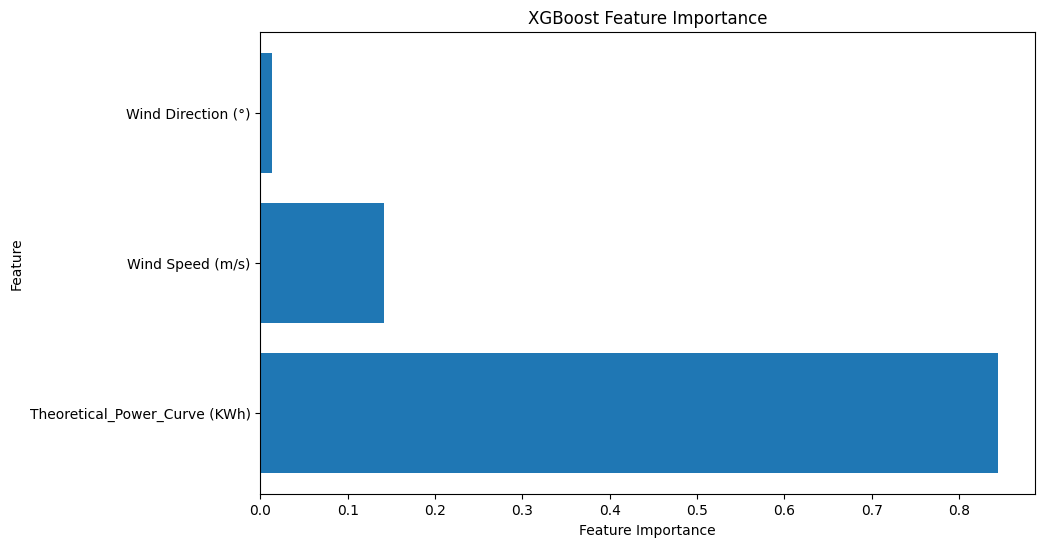

In [21]:
feature_importances = xgb_model.feature_importances_

feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()
